<a href="https://colab.research.google.com/github/meetAmarAtGithub/15_Reva_Speech_Analytics/blob/main/FinalExam_GroupB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/"

/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics


## Audio analysis - Music genre classification

In [ ]:
!pip install pyAudioAnalysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264374 sha256=cf038224843849c7b9b8575b24a6a045df195bf965f00cbee27ac339e98a6a3a
  Stored in directory: /root/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyAudioAnalysis


In [ ]:
!pip install eyed3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 14.3 MB/s eta 0:00:00


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import the required files
from pyAudioAnalysis import MidTermFeatures as aF

In [ ]:
#Import base libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import classifiers
#Local models
from sklearn.naive_bayes import GaussianNB

#Linear models
from sklearn.linear_model import LogisticRegression

#Non linear models
from sklearn import tree

#Validation libraries
from sklearn.metrics import confusion_matrix


In [ ]:
#Load the data
path = "/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis"

In [ ]:
dirs = [path+"/classical/", path+"/janapada/"]

In [ ]:
dirs

['/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/',
 '/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/janapada/']

In [ ]:
#Define classes
class_names = ['classical', 'metal']

In [ ]:
print(class_names)

['classical', 'metal']


In [ ]:
#initialize minimu window, minimum step, window size and step size
m_win, m_step, s_win, s_step = 1, 1, 0.1, 0.05

In [ ]:
# segment-level feature extraction:
features = []

In [ ]:
#Extract the features
for d in dirs: # get feature matrix for each directory (class)
    print(d)
    f, _, fn = aF.directory_feature_extraction(d, m_win, m_step,
                                                   s_win, s_step)
    features.append(f)

/content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/
Analyzing file 1 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip1.wav
Analyzing file 2 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip12.wav
Analyzing file 3 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip15.wav
Analyzing file 4 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip17.wav
Analyzing file 5 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/Audio segmentation analysis/classical/classic_balamurali_20_clip19.wav
Analyzing file 6 of 12: /content/gdrive/My Drive/Colab Notebooks/Reva/15_Speech_Analytics/A

In [ ]:
print(features[0].shape, features[1].shape)

(12, 138) (12, 138)


In [ ]:
# select 2 features and create feature matrices for the two classes:
f1 = np.array([features[0][:, fn.index('spectral_centroid_mean')],
               features[0][:, fn.index('energy_entropy_mean')]])

In [ ]:
f2 = np.array([features[1][:, fn.index('spectral_centroid_mean')],
               features[1][:, fn.index('energy_entropy_mean')]])

In [ ]:
X = np.concatenate((f1.T, f2.T), axis = 0)

In [ ]:
#Create labels
y = np.concatenate((np.zeros(f1.shape[1]), np.ones(f2.shape[1])))

### (a)	Extract features into a pandas data frame.

In [ ]:
#Create a data frame
df = pd.DataFrame(X, columns = ['scm', 'eem'])
df['label'] = y
df['label'] = df['label'].astype(int)

In [ ]:
df.head(5)

,scm,eem,label
0,0.149426,3.209471,0
1,0.140915,3.159590,0
2,0.163044,3.257173,0
3,0.118440,3.094551,0
4,0.172501,3.183388,0


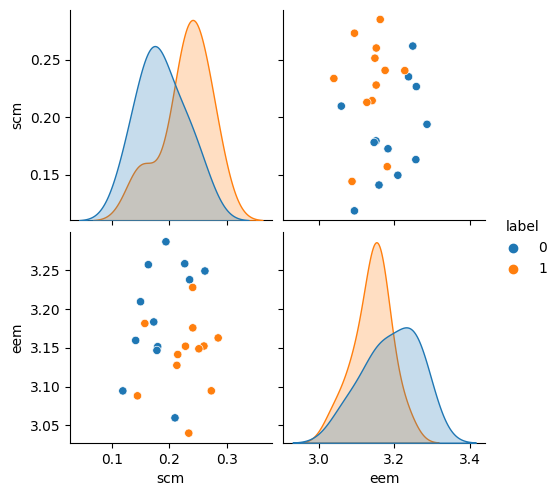

In [ ]:
#Visualize the songs
sns.pairplot(df, hue = 'label')

In [ ]:
# Prepare the data
data = df[['scm', 'eem']].values
labels = df['label'].values

## (b)	Build and validate the classification model.
## (c)	Show classification evaluation metrics visually.

### **Build naive Bayesian model**

In [ ]:
gnb = GaussianNB()
gnb.fit(data, labels)

GaussianNB()

In [ ]:
y_pred = gnb.predict(data)

In [ ]:
#Confusion matrix for NB
predicted_labels = gnb.predict(data)
confusion_matrix(labels, predicted_labels)

array([[11,  1],
       [ 3,  9]])

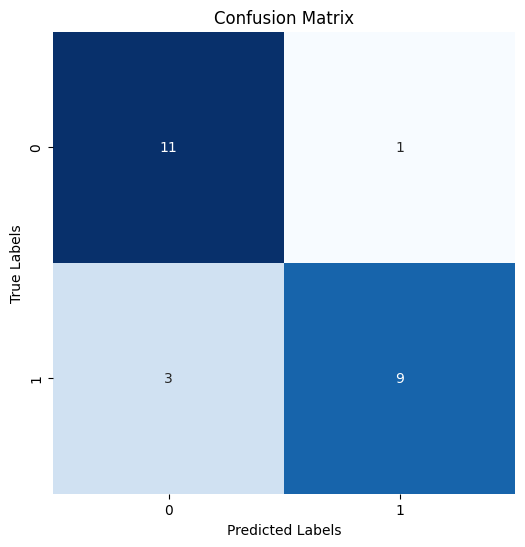

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Compute the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)
classification_metrics = classification_report(labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_metrics)


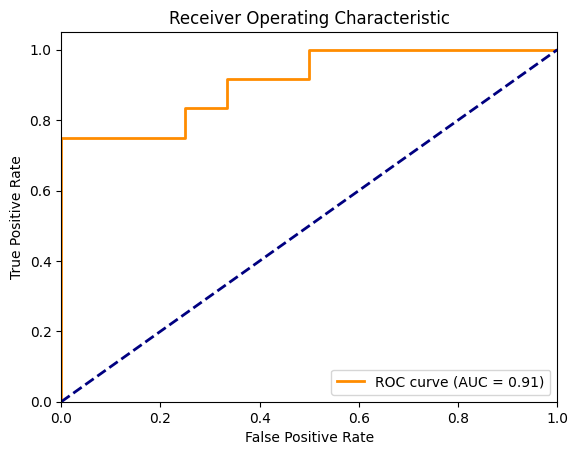

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Prepare the data
data = df[['scm', 'eem']].values
labels = df['label'].values

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Train the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(data, labels_encoded)

# Predict probabilities for ROC curve
probs = classifier.predict_proba(data)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(labels_encoded, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Logistic regression model**

In [56]:
logreg = LogisticRegression()
logreg.fit(data, labels)
predicted_labels = logreg.predict(data)
confusion_matrix(labels, predicted_labels)

array([[11,  1],
       [ 2, 10]])

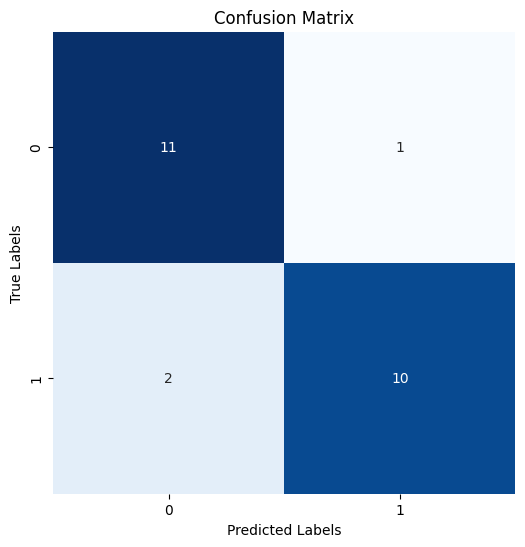

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Compute the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)
classification_metrics = classification_report(labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_metrics)


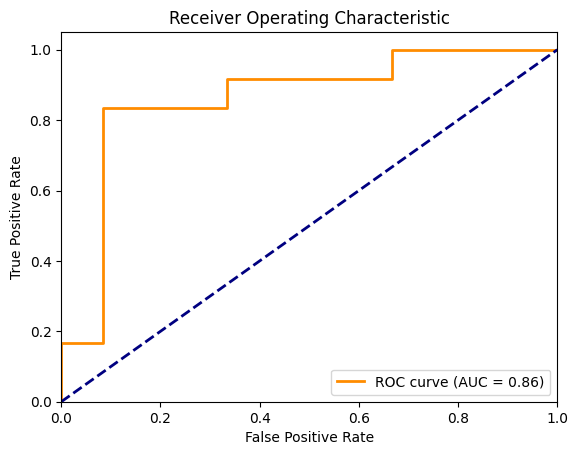

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Prepare the data
data = df[['scm', 'eem']].values
labels = df['label'].values

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Train the logistic regression classifier
classifier = LogisticRegression()
classifier.fit(data, labels_encoded)

# Predict probabilities for ROC curve
probs = classifier.predict_proba(data)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(labels_encoded, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### **Decision tree classifier**

In [59]:
dt = tree.DecisionTreeClassifier()
dt.fit(data, labels)
predicted_labels = dt.predict(data)
confusion_matrix(labels, predicted_labels)

array([[12,  0],
       [ 0, 12]])

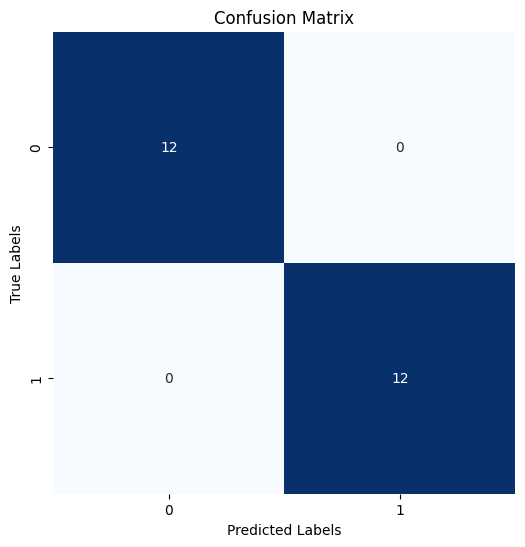

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


# Compute the confusion matrix
confusion = confusion_matrix(labels, predicted_labels)
classification_metrics = classification_report(labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:\n", classification_metrics)


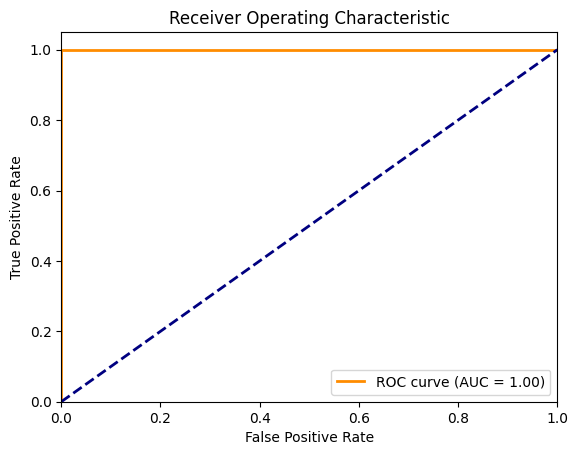

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Prepare the data
data = df[['scm', 'eem']].values
labels = df['label'].values

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Train the Decision Tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(data, labels_encoded)

# Predict probabilities for ROC curve
probs = classifier.predict_proba(data)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(labels_encoded, probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


#Conclusion



Based on the ROC AUC scores, the Decision Tree model performs the best, achieving a perfect AUC score of 1.0. However, it's important to consider the context and specific requirements of a problem.

If we prioritize a balanced performance with high accuracy and a low number of misclassifications, both Naive Bayes and Logistic Regression offer promising results. Naive Bayes has a slightly higher ROC AUC of 0.91 compared to Logistic Regression's 0.86. Additionally, their confusion matrices show similar performance, with a small number of misclassifications.

Considering the simplicity and efficiency of Naive Bayes, it may be a suitable choice for larger datasets. Naive Bayes is known for its scalability and performs well even with a limited amount of training data. Therefore, if your dataset is large, Naive Bayes could be a good option to consider.